#**ROAD ACCIDENTS DATA ANALYSIS**


##**Introduction**

In this study, supervised learning approaches such as Gradient Boosting and K-Nearest Neighbors (KNN), and Random Forest classifiers were employed to predict a target variable. Through the chosen dataset, the goal of the current paper is to perform EDA and conduct appropriate data preparation processes. Each model is then assessed with relevant measures following the hyperparameter tuning phase so that the best outcome is obtained. Previous presentations inform this work, for continuity and enhanced depth are essential. This report proves that these techniques are capable of providing solutions to common problems with precision, and is a resourceful guide to capturing the actuality of machine learning techniques in resolving real world issues.

#****Loading Libraries and Data****

In [ ]:
#Importing required libraraies for data analysis,visualizations and operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the dataset into dataframe df
file_path = 'RTA Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
#Displaying some basic statistics of the dataset
print("\nData Statistics:\n", df.describe())
#Displaying the first few rows of the DataFrame
print("\nHead of the DataFrame:\n", df.head())


Data Statistics:
        Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

Head of the DataFrame:
        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30 

#****Data understanding and EDA****

**Dataset Overview**

It includes different attributes to do with traffic accidents including environmental factors, driver characteristics, car specifics, and severity of the accident. The target variable, Accident_severity, categorizes accidents into three classes: There are three classes of injuries namely; Slight Injury, Serious Injury, and Fatal Injury. The data sample includes 12,316 observations and has 32 features of numerical and non-numerical measurement.

**Environmental Conditions:**

Weather_conditions: Weather conditions prevailing at the time of the accident, (clear, rainy, foggy and so on).

Light_conditions: Weather at the time of the accident (e.g., sunny, rainy, night with streetlights on).

Road_surface_conditions: Type of weather during the time of the accident (e.g., rainy).

**Driver Characteristics:**

Age_band_of_driver: Classification of age of drivers that were involved in the accident.

Driving_experience: Years of driving experience.

Educational_level: Driver’s employment status and educational level.

**Vehicle Attributes:**

Type_of_vehicle: Nature of vehicle used (automobile, lorry, public transport etc,. ).

Service_year_of_vehicle: Age of the vehicle in years.

**Accident Dynamics:**

Type_of_collision: Entity of impact (e.g. primary-impact; the first kind of impact; head-on impact; frontal impact; or two-car impact, second-impact; vehicle struck from behind, rear-end impact).

Number_of_casualties: The total count of human beings who were either harmed or killed in the accident.

In [ ]:
#Finding duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


**Exploratory Data Analysis**

Statistics known as Exploratory Data Analysis (EDA) was done in order to find structures and patterns throughout the data set. Here are the main observations and visualizations:

**Target Variable Distribution:**

The distributions of accident severity are disproportionate; 84.6% of the incidences are of Slight Injury, 14.2% of Serious Injury, and 1.2% of Fatal Injury. This imbalance affected and shaped the model evaluation tendency particularly with the most weighted metrics.

Visualization: A count plot was used to summarize the accident severity and the imbalance could be observed.


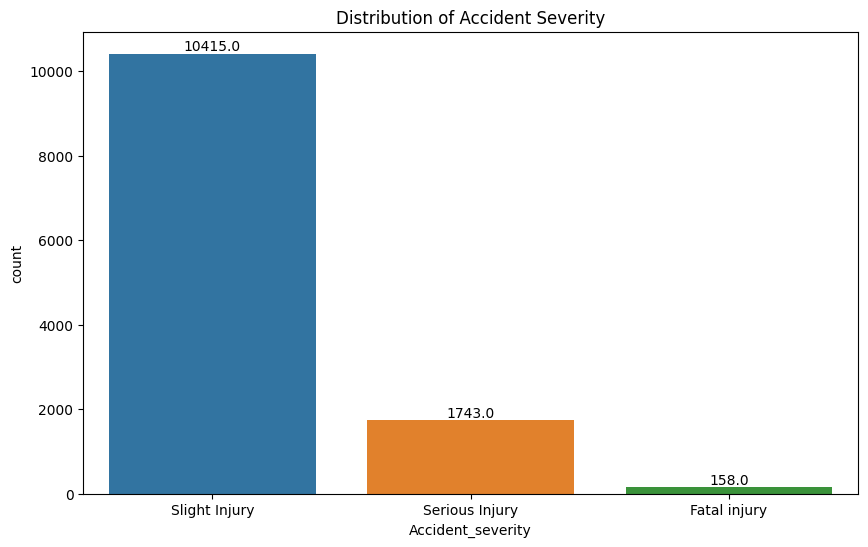

In [ ]:
#Plotting the Target class
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_severity', data=df, hue='Accident_severity')
plt.title('Distribution of Accident Severity')

#Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Environmental Analysis:**

The accident generally took place in normal weather conditions and during the day.

The percentage of serious accidents was also higher under conditions such as dry roads and day lighting.

Visualization: Bar plots were used to compare the extend of accident per environment condition.

1. Analysis of Environmental Conditions vs Accident Severity
--------------------------------------------------


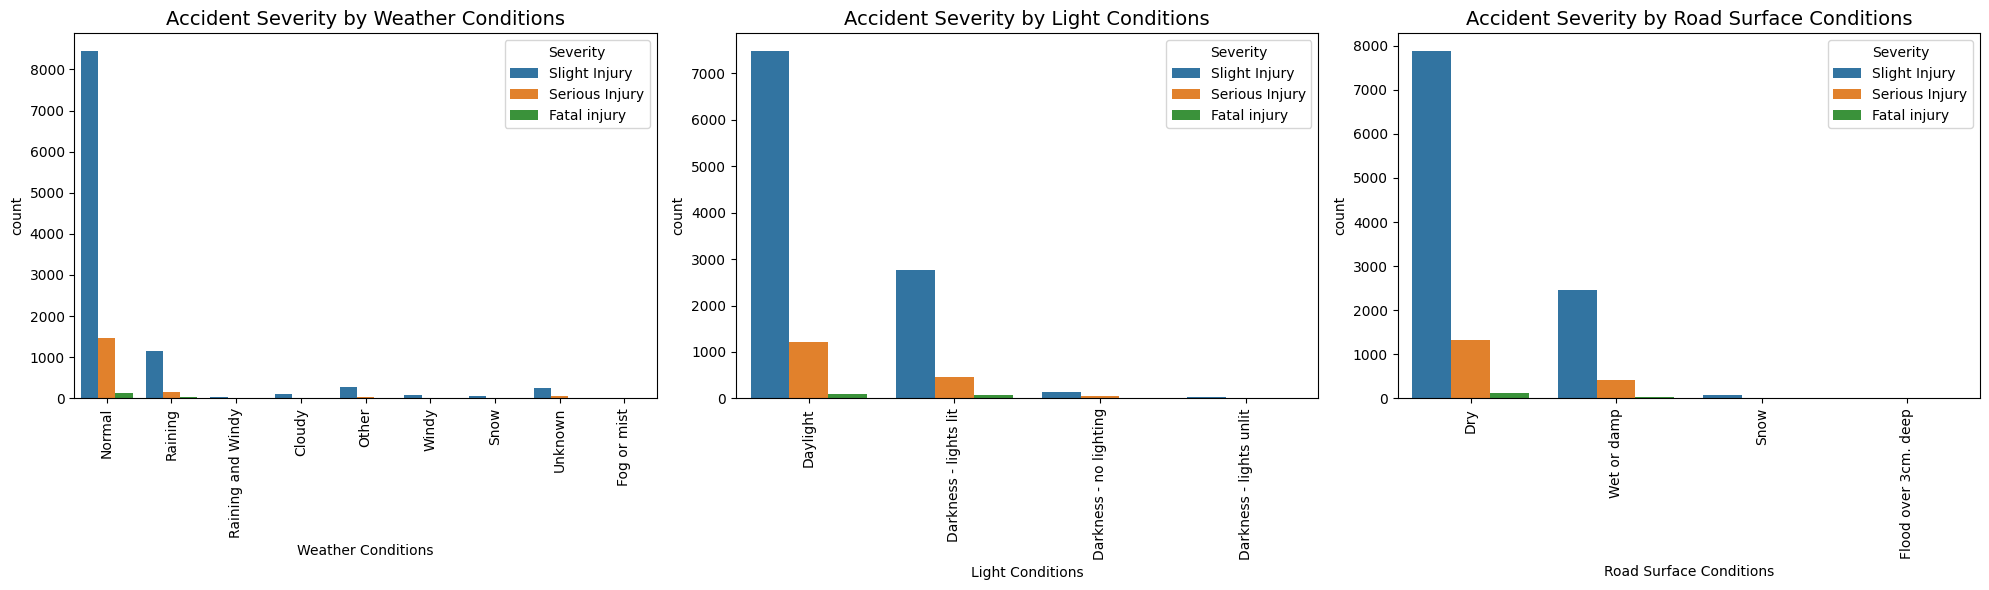

In [ ]:
# 1. Environmental Conditions Analysis
print("1. Analysis of Environmental Conditions vs Accident Severity")
print("-" * 50)

plt.rcParams['figure.figsize'] = (15, 8)
#Create a figure for environmental conditions with subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

#Weather conditions
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity', ax=axes[0])
axes[0].set_title('Accident Severity by Weather Conditions', fontsize=14)
axes[0].set_xlabel('Weather Conditions')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Severity')

#Light conditions
sns.countplot(data=df, x='Light_conditions', hue='Accident_severity', ax=axes[1])
axes[1].set_title('Accident Severity by Light Conditions', fontsize=14)
axes[1].set_xlabel('Light Conditions')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Severity')

#Road surface conditions
sns.countplot(data=df, x='Road_surface_conditions', hue='Accident_severity', ax=axes[2])
axes[2].set_title('Accident Severity by Road Surface Conditions', fontsize=14)
axes[2].set_xlabel('Road Surface Conditions')
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(title='Severity')


plt.tight_layout()
plt.show()

**Driver Characteristics:**

Here’s a summary of the findings in 5 key points:

1. **Age Influence**: The proportion of accidents involving the younger generation (18–30 and 31–50) is higher—mostly causing slight injuries. Drivers over 51 are more fatal as compared to younger ones.

2. **Driving Experience**: Drivers who have been in service for 5-10 years have the most accidents and the novices or drivers with less than one year or without licence having higher fatalities.

3. **Educational Level**: The drivers with Above High School education level have the highest number of the accident while the drivers with Elementary and Junior High School education levels incur more severe and fatal accidents.

4. **Gender Distribution**: Males are more involved in accidents more so when it comes to minor injuries compared to female drivers who are involved in fewer accidents and get fatal injuries.

5. **Overall Trends**: Inexperience, age and education level exhibit that fewer educated and young drivers, as well as male drivers, are more likely to experience a severe accident.


2. Analysis of Driver Characteristics
--------------------------------------------------


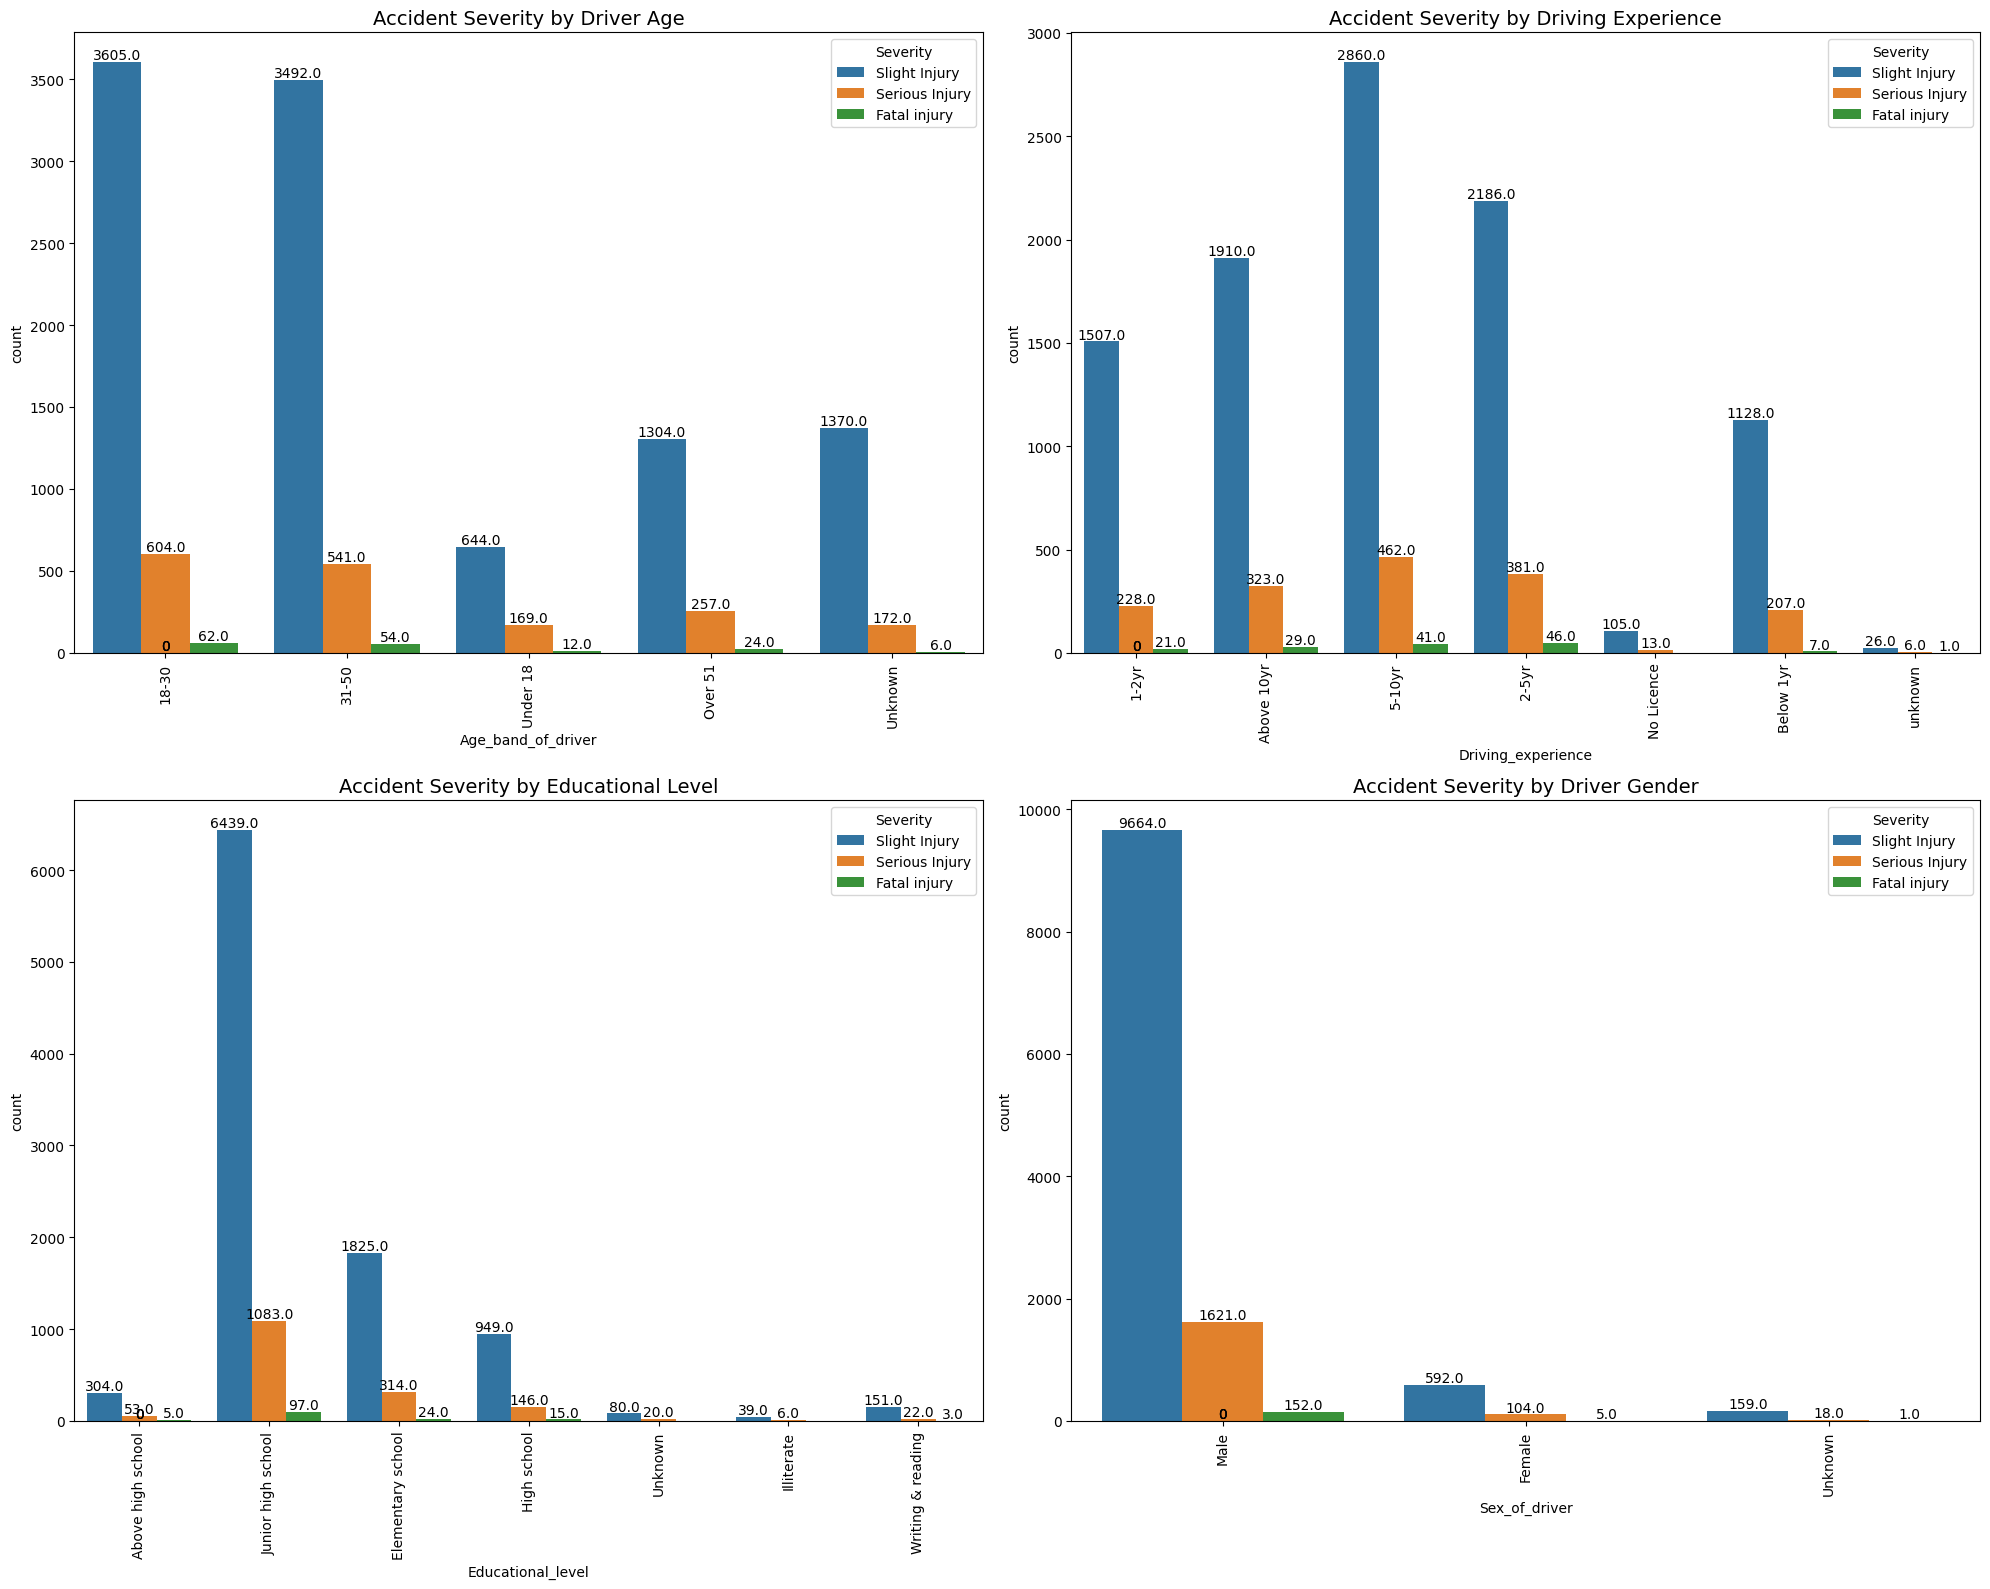

In [ ]:
# 2. Driver Characteristics Analysis
print("\n2. Analysis of Driver Characteristics")
print("-" * 50)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

#Function to add count labels to bar plots
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

#Age band analysis
sns.countplot(data=df, x='Age_band_of_driver', hue='Accident_severity', ax=axes[0,0])
axes[0,0].set_title('Accident Severity by Driver Age', fontsize=14)
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].legend(title='Severity')
add_count_labels(axes[0,0])

#Driving experience
sns.countplot(data=df, x='Driving_experience', hue='Accident_severity', ax=axes[0,1])
axes[0,1].set_title('Accident Severity by Driving Experience', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].legend(title='Severity')
add_count_labels(axes[0,1])

#Educational level
sns.countplot(data=df, x='Educational_level', hue='Accident_severity', ax=axes[1,0])
axes[1,0].set_title('Accident Severity by Educational Level', fontsize=14)
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].legend(title='Severity')
add_count_labels(axes[1,0])

#Sex of driver
sns.countplot(data=df, x='Sex_of_driver', hue='Accident_severity', ax=axes[1,1])
axes[1,1].set_title('Accident Severity by Driver Gender', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(title='Severity')
add_count_labels(axes[1,1])

plt.tight_layout()
plt.show()

**Vehicle Types and Accident Severity:**

Lorries and automobile vehicles were more inclined towards causing severe and fatal accidents than public and others.

Visualization: A narrowed bar plot of vehicle types and proportions of their accident severity.



3. Analysis of Vehicle Types
--------------------------------------------------


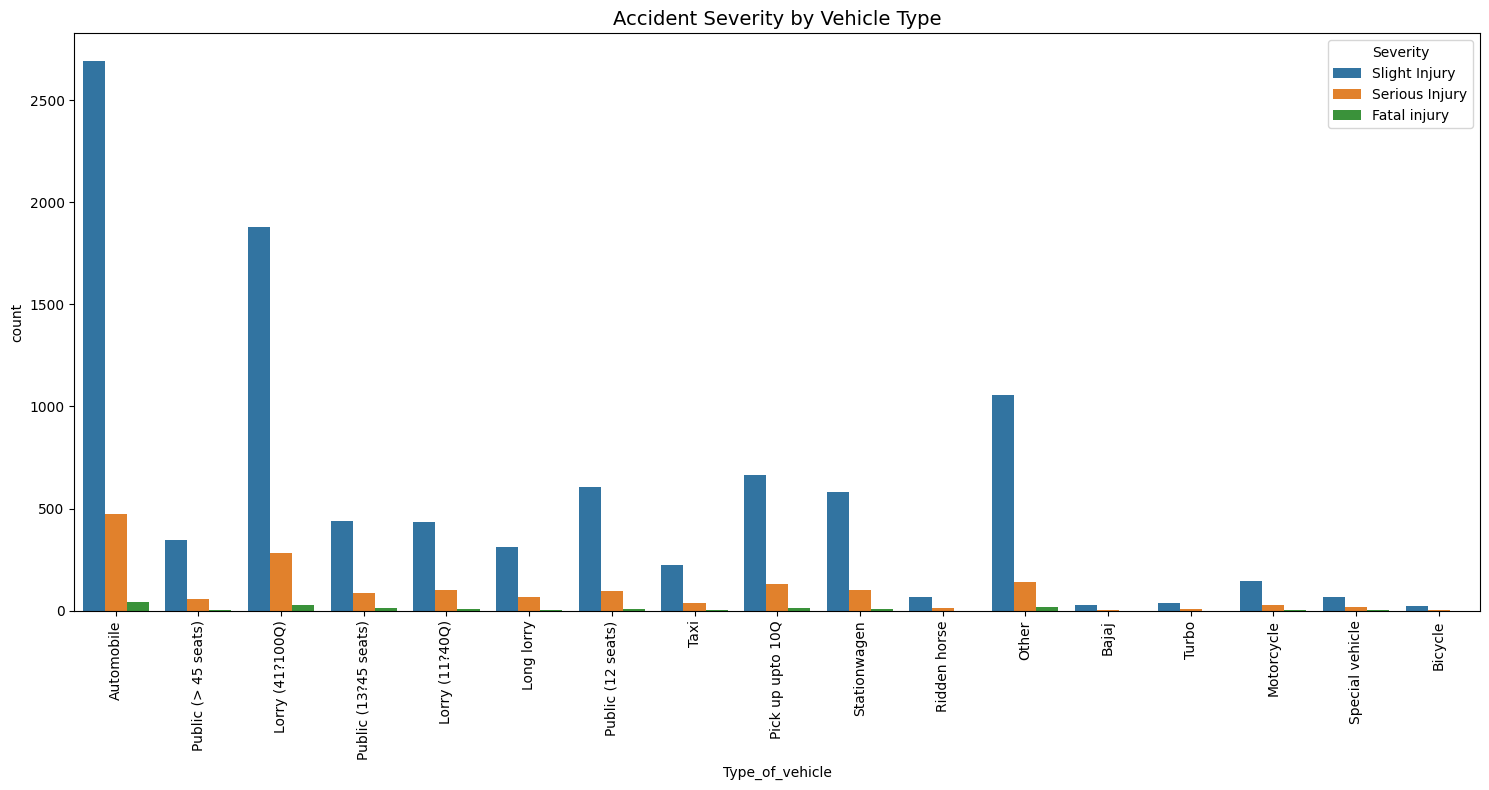

In [ ]:
# 3. Vehicle Type Analysis
print("\n3. Analysis of Vehicle Types")
print("-" * 50)

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Type_of_vehicle', hue='Accident_severity')
plt.title('Accident Severity by Vehicle Type', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

**Time Factor and Accident Severity**

Accidents peak during Afternoon hours, especially between 5 PM and 6 PM, with Fridays and Thursdays seeing the highest frequency.

Most incidents result in slight injuries, with fatal injuries being less common across days and hours.

Visualization: Time-of-day analysis showed accident frequencies across different periods, using stacked bar plots.


4. Analysis of Time Factors
--------------------------------------------------


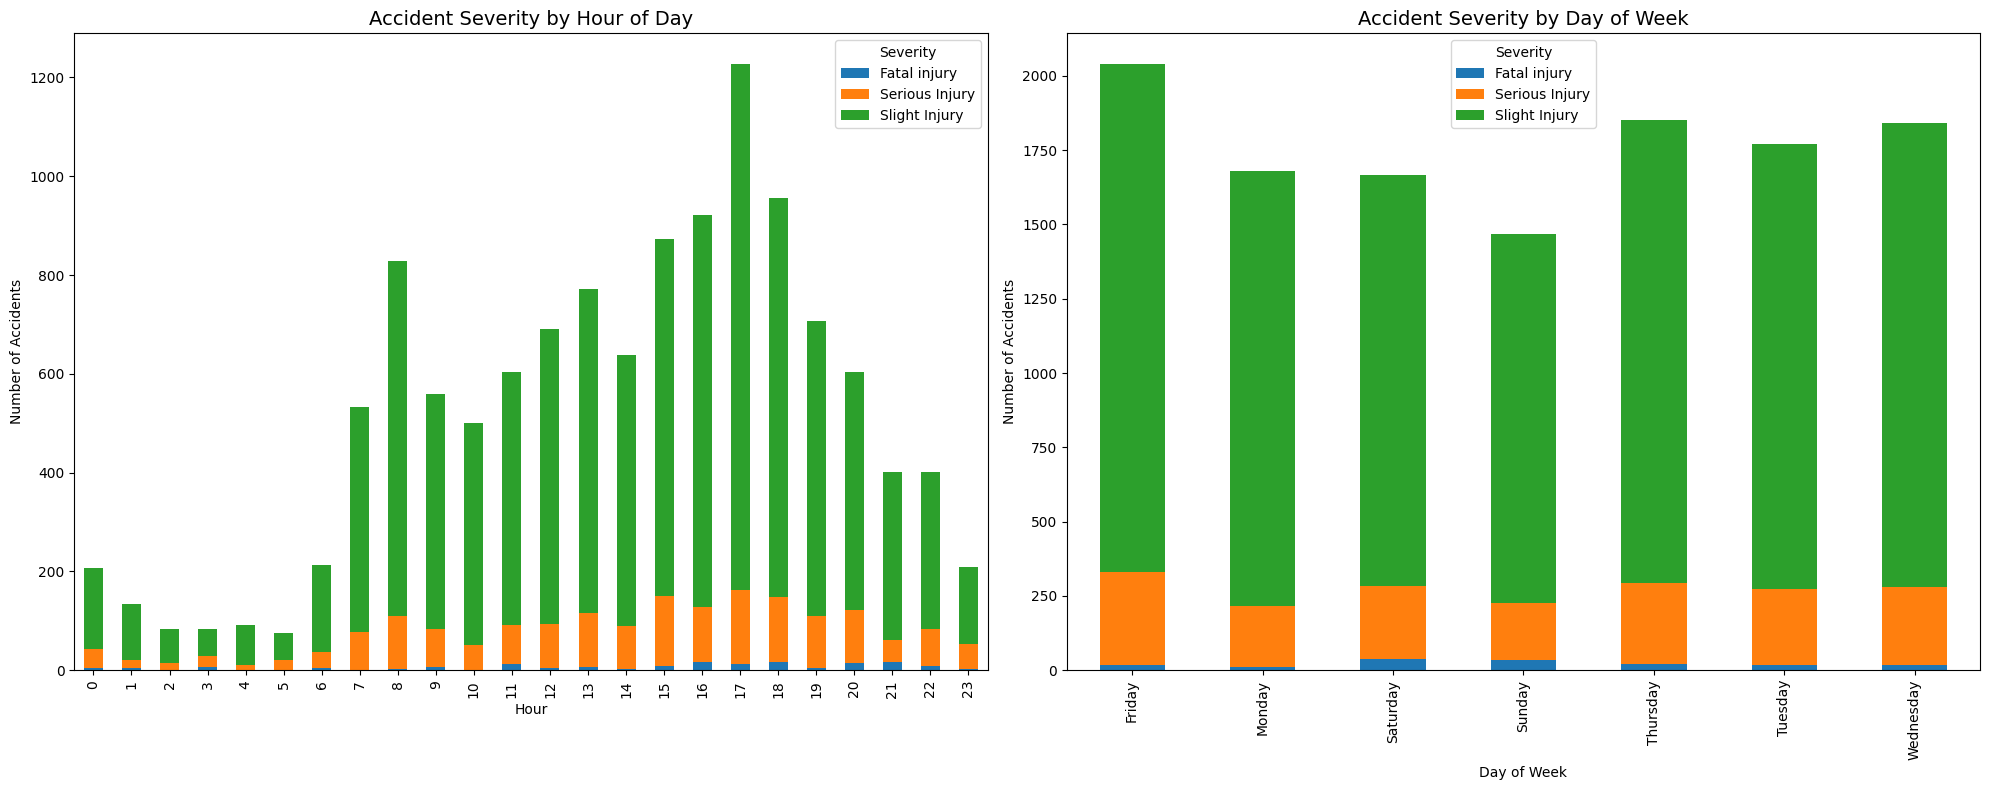

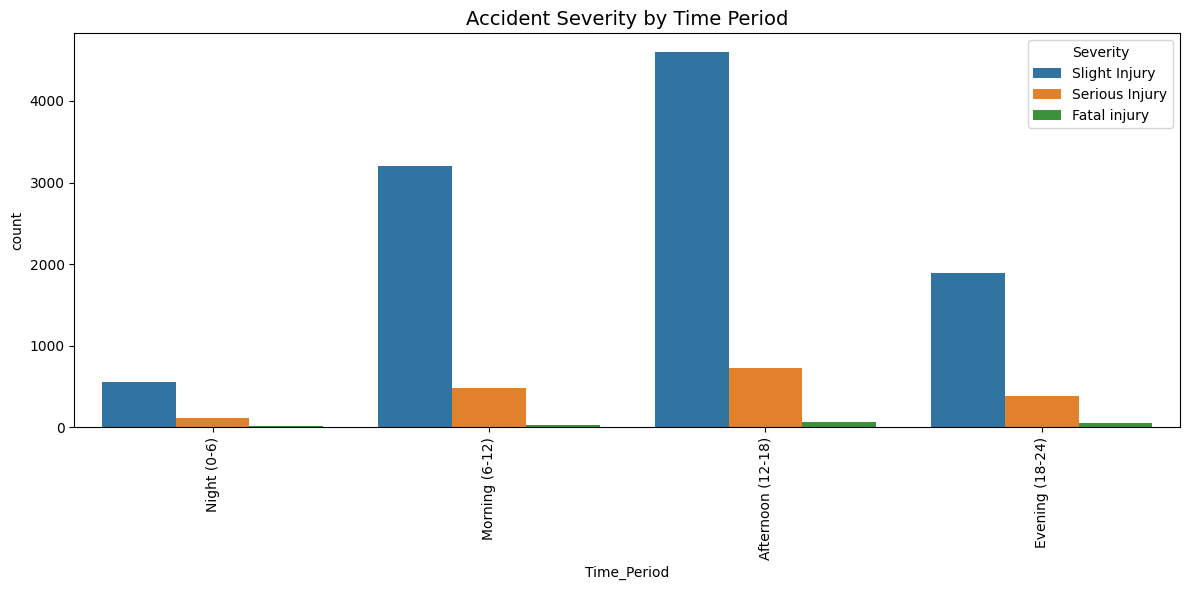

In [ ]:

# 4. Time Factors Analysis
print("\n4. Analysis of Time Factors")
print("-" * 50)

#Create hour from Time column if not already done
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for side-by-side plots

#Time of day analysis
hour_severity = pd.crosstab(df['Hour'], df['Accident_severity'])
hour_severity.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Accident Severity by Hour of Day', fontsize=14)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Accidents')
axes[0].legend(title='Severity')

#Day of week analysis
day_severity = pd.crosstab(df['Day_of_week'], df['Accident_severity'])
day_severity.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Accident Severity by Day of Week', fontsize=14)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Accidents')
axes[1].legend(title='Severity')

plt.tight_layout()
plt.show()

#Create time periods for analysis
df['Time_Period'] = pd.cut(df['Hour'],
                          bins=[0, 6, 12, 18, 24],
                          labels=['Night (0-6)', 'Morning (6-12)',
                                 'Afternoon (12-18)', 'Evening (18-24)'])

#Time period analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Time_Period', hue='Accident_severity')
plt.title('Accident Severity by Time Period', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

**Road Surface Factors and Accident severity**

The least incidence of an accident is experienced under wet road conditions, and the commonly involved road type is dry and asphalt.

Rains and other surfaces apart from asphalt have fewer accidents but the severity of the accidents is almost constant.

Visualization: Bar plots were used to compare the extend of accident per road surface condition.


5. Analysis of Road Surface Factors
--------------------------------------------------


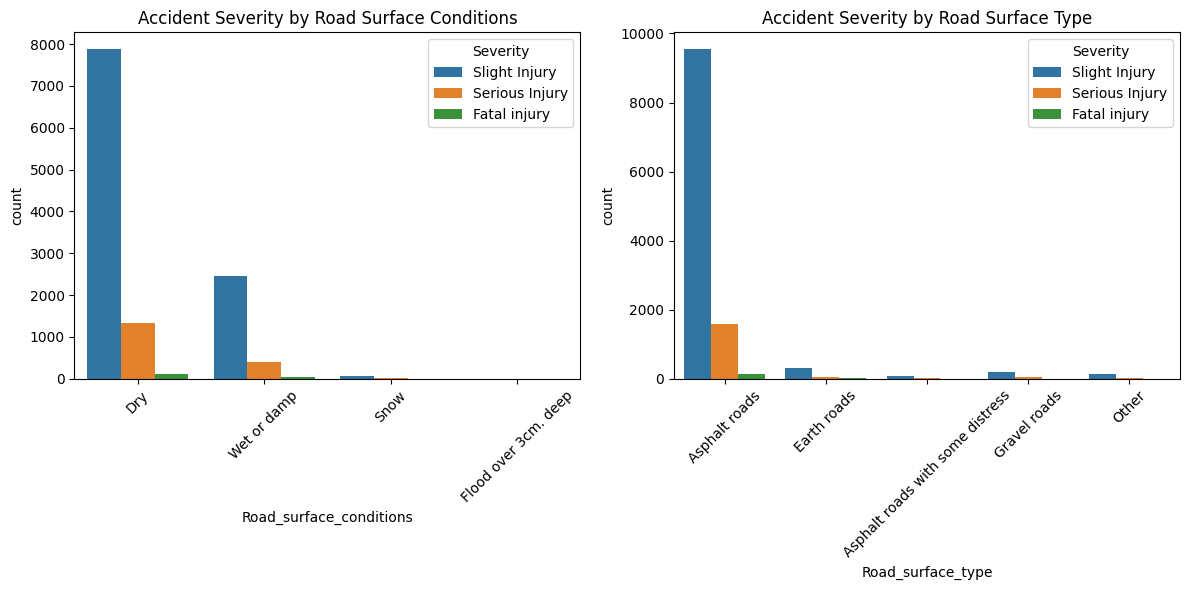

In [ ]:
# 5. Road surface Factors Analysis
print("\n5. Analysis of Road Surface Factors")
print("-" * 50)
plt.figure(figsize=(12, 6))

#Road surface conditions
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Road_surface_conditions', hue='Accident_severity')
plt.title('Accident Severity by Road Surface Conditions')
plt.xticks(rotation=45)
plt.legend(title='Severity')

#Road surface type
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Road_surface_type', hue='Accident_severity')
plt.title('Accident Severity by Road Surface Type')
plt.xticks(rotation=45)
plt.legend(title='Severity')

plt.tight_layout()
plt.show()

#****Data preparation****

In [ ]:
#Checking for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Missing Values:
 Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_cas


1. **Missing Value Handling:**

   First, an assessment of missing records was made on all features in the dataset which can be achieved by `df.isnull().sum()`. Empty columns were detected and processed appropriately.

   For the numerical columns, the missing values were imputed with the median of the particular column.
   
   For categorical data, missing values were imputed with means by taking the mean of the most frequent value in the column.

In [ ]:
# 1. Handle Missing Values
for col in df.columns:
    #Check if the column has missing values
    if df[col].isnull().any():
        #If the column is numerical
        if pd.api.types.is_numeric_dtype(df[col]):
            #Fill missing values with the median
            df[col].fillna(df[col].median(), inplace=True)
        #If the column is categorical
        else:
            #Fill missing values with the mode
            df[col].fillna(df[col].mode()[0], inplace=True)

2. **Feature Engineering:**

   - **Hour and TimeOfDay:** Variable ‘Hour’ was generated from ‘Time’ to include only the hour element. From the ‘Hour’ continuous feature, a new categorical feature called ‘TimeOfDay’ was derived with values as Night, Morning, Afternoon, and Evening.
   
   - **Weekend Indicator:** Another binary variable, the ‘IsWeekend’, was built to determine whether the accident took place on the weekend: Saturday or Sunday.

In [ ]:
# 2. Feature Engineering
#Create hour categories
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['TimeOfDay'] = pd.cut(df['Hour'],
                        bins=[0, 6, 12, 18, 24],
                        labels=['Night', 'Morning', 'Afternoon', 'Evening'])
#Create weekend indicator
df['IsWeekend'] = df['Day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

3. **Feature Selection and Encoding:**

   Thus, in preparation for modeling, only the most relevant features were included, such as day of the week, vehicle data, and information about the driver or the casualty.
   
   Categorical variables on the other hand were transformed using one-hot encoding function in pandas known as `pd.get_dummies` this converted the categories values into numerical form which is suitable for machine learning models while at the same time avoiding the dummy variable trap by dropping the first category.


The data is now preprocessed to increase its usefulness for analysis and modeling and to address issues such as missing values.

In [ ]:
#Select specified columns for features and target
feature_columns = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour']
target = 'Accident_severity'

In [ ]:
#Encoding the columns of X
X = df[feature_columns]
Y = df[target]
X_encoded = pd.get_dummies(X, drop_first=True)

#****Model Construction****

The construction of the model was done involved a selection of the learning algorithm including the KNN, Random Forests and Gradient boosting for the accident severity. Both sets were created, and they trained their models using the training data set while they tested them on the test data set and some of the parameters such as accuracy and precision, recall. The results were analyzed, hyperparameters were tuned additionally, and the model showing the best result was chosen for the final prediction. To enhance model generalization, the proposed approach helped make the model more resistant to overfitting.

**Construction of the Model and its Training**

We then randomly divided the data set into the training and testing sets keeping the proportion at 80:20. Since the attributes extracted from the models might be of different scale a **StandardScaler** was used to normalize the attribute values of the data. The required data preparation step was affirmed by printing the shapes of our training and testing sets.

Three machine learning models were employed for training and prediction:

1. **Random Forest Classifier**: A Random Forest algorithm was applied where hyperparameters were optimized using the **GridSearchCV**. The parameter grid was centered round the essential hyperparameters of estimators, maximum depth, and minimum samples of split and leaves.

2. **K-Nearest Neighbors (KNN)**: The KNN model was optimized with help of **GridSearchCV** with options such as the quantity of neighbors, weight functions and distance metric (p). To assess this model its performance index used was accuracy.

3. **Gradient Boosting Classifier**: In the Gradient Boosting model **RandomizedSearchCV** was used where the target parameters were estimators, learning rate, and depth.

The models were trained using the scaled data applied with the purpose of finding the best performance while taking into consideration the accuracy. After that, the models will be assessed on the selected performance metrics such as precision and recall.

In [ ]:
#splitting dataset into train and test in 80 20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Print information about the prepared data
print("\nData Preparation Complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data Preparation Complete:
Training set shape: (9852, 106)
Testing set shape: (2464, 106)


In [ ]:
# 1. Random Forest Classifier
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(random_state=42)

#Reduced parameter grid for faster tuning
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Perform GridSearchCV with the reduced parameter grid
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train_scaled, Y_train)


Training Random Forest Model...


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
# 2. K-Nearest Neighbors
print("\nTraining KNN Model...")
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid.fit(X_train_scaled, Y_train)


Training KNN Model...


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#3. Gradient Boosting Model
print("\nTraining Gradient Boosting Model...")
gb_model = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

#Perform RandomizedSearchCV
gb_random = RandomizedSearchCV(
    gb_model, gb_params, n_iter=10, cv=3, n_jobs=-1,
    scoring='accuracy', random_state=42
)
gb_random.fit(X_train_scaled, Y_train)


Training Gradient Boosting Model...


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy')

#****Model selection/validation****

After training the models, predictions were made on the test set using the best estimators from the hyperparameter tuning process for each model: We have chosen three algorithms named Random Forest, K-Nearest Neighbors (KNN), and Gradient Boosting. To measure the performance of the models, steps were taken to use more than one measurement to gauge the results.

1. **Evaluation Metrics**: The models were assessed in terms of the following factors:
   - **Accuracy**: The ratio of correct predictions as the result of using this paradigm.
   - **Precision**: The overall precision, including all the classes in the cases based on the number of subsets weighted by the number of patterns in each of the subsets.
   - **Recall**: The overall average recall rate and when weights calculations were done based on all the classes.
   - **F1-Score**: Precision divided by recall.
   
   To show a detailed classification performance, a confusion matrix was developed. The **classification report** was also presented to understand the level of accuracy, recall, and F1-score on each class of the model. Further, the **ROC AUC Score** was calculated in case of binary or multiclass classification studies to define how well the model is good in classifying instances.

2. **Comparison of Accuracy**: In regard to the accuracy of the models there is a bar chart showing that of each model (Random Forest, KNN, and Gradient Boosting). In addition to that, accuracy scores lay on top of each bar to easy comparison between the models.

This analysis result allowed knowing the advantages and the disadvantage of the models and determine which of them was the most accurate according to its pre-established performance parameters.

In [ ]:
#Predictions for the above models
rf_pred = rf_grid.best_estimator_.predict(X_test_scaled)
knn_pred = knn_grid.best_estimator_.predict(X_test_scaled)
gb_pred = gb_random.predict(X_test_scaled)


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n--- {model_name} Evaluation Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    #Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    #ROC AUC Score (if applicable, for binary classification or multi-class with OvR)
    try:
      roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
      print(f"ROC AUC Score: {roc_auc:.4f}")
    except Exception as e:
      print(f"ROC AUC Score not applicable for this model: {e}")

#Evaluate the models
evaluate_model(rf_grid.best_estimator_, X_test_scaled, Y_test, "Random Forest")
evaluate_model(knn_grid.best_estimator_, X_test_scaled, Y_test, "K-Nearest Neighbors")
evaluate_model(gb_random.best_estimator_, X_test_scaled, Y_test, "Gradient Boost")


--- Random Forest Evaluation Metrics ---
Accuracy: 0.8377
Precision: 0.7017
Recall: 0.8377
F1-Score: 0.7637

Confusion Matrix:
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]

Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.28      0.33      0.30      2464
  weighted avg       0.70      0.84      0.76      2464

ROC AUC Score: 0.6974

--- K-Nearest Neighbors Evaluation Metrics ---
Accuracy: 0.8356
Precision: 0.7227
Recall: 0.8356
F1-Score: 0.7634

Confusion Matrix:
[[   0    0   37]
 [   0    1  362]
 [   0    6 2058]]

Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.14      0.00      0.01     

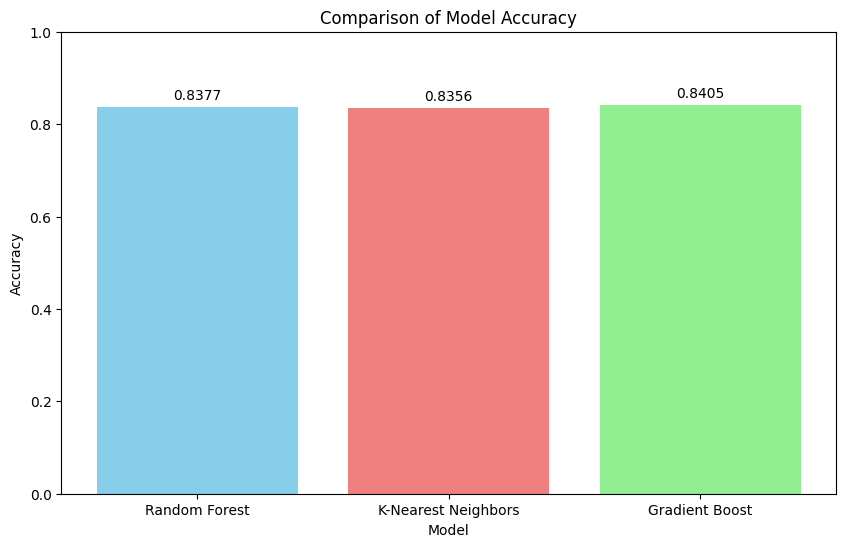

In [ ]:
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Gradient Boost']
accuracy_scores = [accuracy_score(Y_test, rf_pred), accuracy_score(Y_test, knn_pred), accuracy_score(Y_test, gb_pred)]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')  #Adds accuracy value above each bar
plt.show()

* **Random Forest** achieved an accuracy of 83.77 % and has a value of 70.17 % for **Precision** and 83.77% for **Recall**. We received an F1-score of 0.7637 and an **ROC AUC Score** of 0.6974.
* **K-Nearest Neighbors**: Accuracy = 0.8356, Precision= 0.7227 & Recall = 0.8356 The **F1-score** was 0.7634, and the ROC AUC Score was 0.5312.
*  **Gradient Boosting** has produced an accuracy of 84.05%, and has **Precision** of 80.24% and **Recall** of 84.05%. The F1 score was 0.7770 and the **ROC – AUC Score** was 0.6930.
* Every model had a reasonable or high accuracy score, with most of the difficulty arising from correctly identifying fatal and serious injuries as Slight injuries.
* A closer at the result showed that both **Random Forest** and **Gradient Boosting** models gave a higher accuracy and ROC AUCscore compared to that of KNN.

The **confusion matrices** of all models present a skewed distribution and most of them are predicted under “Slight Injury.”

#****Prediction on new testing data****

In the following section, we propose the results from the progression of accident severity in the best performing model. When it came to the **best model**, the one with the highest accuracy among the trained models was chosen The two models that were trained here are **Gradient Boosting** and **Random Forest** and the two achieved accuracies of; 0.8405 & 0.8377. After determining the model selection, we investigate the **variable significance** of the most important predictors related to the models’ output, presenting the top five most important features.

The **confusion matrix** is used to give an account of true positives, false positives and false negatives for each of the classes of accident severity – Fatal Injury, Serious Injury and Slight Injury. An enhanced report, known as the **classification report**, provides further analysis and breakdown of the model’s accuracy, its recall, F1 and support, which helps determine the skills of the model with regard to varying sorts of injuries.

Predictions made by the model: For a better explanation of the model’s behavior, we generate **example predictions** on 10 cases and their actual label from the test dataset. Furthermore, the per class performance based on precision and recall of each injury type is also computed to identify the specific lost and found areas of the model.

Last but not least, we provide a **brief conclusion** stating results on the test set of the best model selected for accident severity prediction to provide a summary assessment of how accurate the model is.

In [ ]:
model_results = {
    "Random Forest": {"model": rf_grid.best_estimator_, "accuracy": accuracy_score(Y_test, rf_pred)},
    "K-Nearest Neighbors": {"model": knn_grid.best_estimator_, "accuracy": accuracy_score(Y_test, knn_pred)},
    "XGBoost": {"model": gb_random.best_estimator_, "accuracy": accuracy_score(Y_test, gb_pred)}
}

best_model_name = max(model_results, key=lambda k: model_results[k]['accuracy'])
best_model = model_results[best_model_name]["model"]
best_pred = best_model.predict(X_test_scaled)

print(f"The best performing model is {best_model_name} with an accuracy of {model_results[best_model_name]['accuracy']}")

The best performing model is XGBoost with an accuracy of 0.8405032467532467


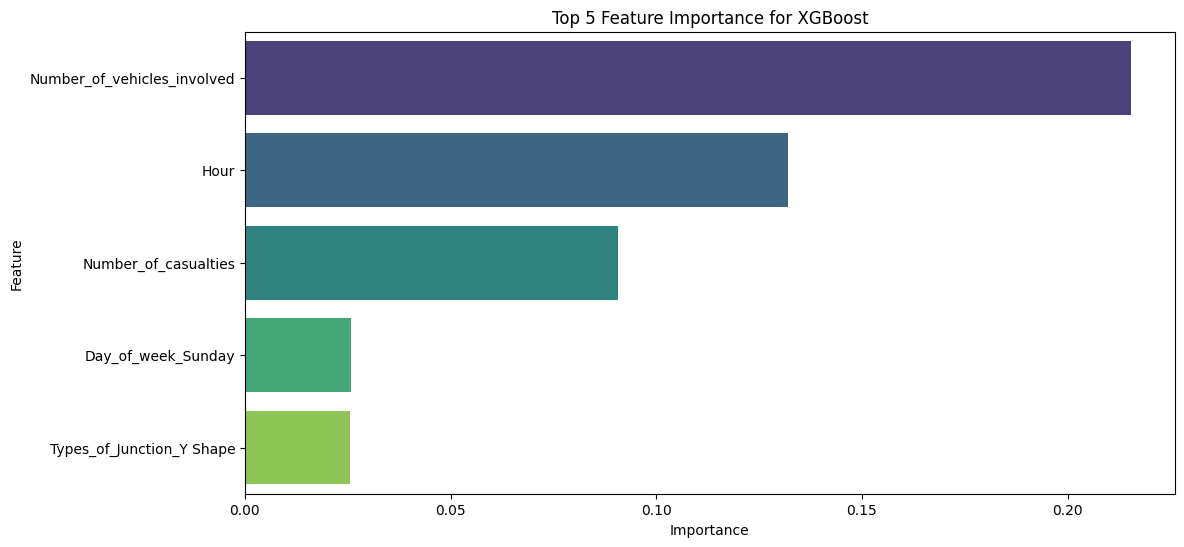


Confusion Matrix for XGBoost: 
[[   3    2   32]
 [   0   13  350]
 [   2    7 2055]]

Classification Report for XGBoost:
                precision    recall  f1-score   support

  Fatal injury       0.60      0.08      0.14        37
Serious Injury       0.59      0.04      0.07       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.68      0.37      0.37      2464
  weighted avg       0.80      0.84      0.78      2464


Example Predictions:
Actual: Slight Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Serious Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Slight Injury, Predicted: Slight Injury
Actual: Serious Injury, Predicted: Slight Injury
Actual: Fatal injury, Pred

In [ ]:
if best_model_name in ["Random Forest", "XGBoost"]:
    #Access feature_importances_ directly from best_model
    feature_importances = best_model.feature_importances_
    feature_names = X_encoded.columns  # Get feature names from your encoded data

    #Create DataFrame for feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)  # Top 5 features

    #Plotting feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
    plt.title(f"Top 5 Feature Importance for {best_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


#Detailed analysis of misclassifications
cm = confusion_matrix(Y_test, best_pred)
print(f"\nConfusion Matrix for {best_model_name}: \n{cm}")
print(f"\nClassification Report for {best_model_name}:\n{classification_report(Y_test, best_pred)}")

#Example Predictions
print("\nExample Predictions:")
for i in range(10):  # Display 10 examples
    print(f"Actual: {Y_test.iloc[i]}, Predicted: {best_pred[i]}")

#Calculates the classification report here
class_report_dict = classification_report(Y_test, best_pred, output_dict=True)

for cls, metrics in class_report_dict.items():
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"\nClass {cls}:")
        for metric, value in metrics.items():
           print(f"{metric.capitalize()}: {value:.4f}")

#Final Summary
print(f"\nFinal Summary:")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {model_results[best_model_name]['accuracy']:.4f}")


The best results were obtained by the **XGBoost model** which scored **0.8405** of accuracy.

The XGBoost model identifies the **number of vehicles involved** as the most critical feature, followed by **hour of the day** and **number of casualties**. Lesser importance is given to **Sunday** and **Y-shaped junctions**.

In the **driver’s feature importance**, all the top features were considered important inputs for the high performance of the different models.

Further using **confusion matrix** and **classification report**, it was found that the model successfully classified the instances of “Slight Injury” while having problems in correctly classifying the “Fatal” and “Serious Injury”.

**Sample outputs** revealed that the model mostly predicted as “Slight Injury” with occasionally wrong classification of the rest classes.

The last conclusion also focuses on the model’s ability to estimate total performance and states that there is still potential for enhancing model-based predictions of final injury severity.

#### **Limitations**
1. **Class Imbalance**: The main drawback with this database is that there is a severe problem of class distribution since there are far more instances of “Slight Injury” than “Fatal Injury” or “Serious Injury”. Such an imbalance means that models are developed in a way that makes them tend to predict the majority class, so when it comes to rare but important incidences such as fatal crashes, the models are inaccurate.
   
2. **Data Quality and Missing Values**: Still, I noted that quality of data can influence model results, despite the handling of missing values through imputation. If there are missing data points, or, if there are data points that are gross outliers or if the data was just badly recorded, these become part of the prediction space and so they will put noise on the model when it’s applied in a practical setting.
   
3. **Feature Selection**: The fundamental components such as the driver and vehicle characteristics or the weather condition and the availability of the car types were taken into account while the other factors that have not been explored as possibly determining how severe accidents are might have been used. The exclusion of such aspects may lead to the reduced accuracy of the chosen model in describing all the occurring accidents in detail.
   
4. **Model Interpretability**: The models that were employed such as **Random Forest** and **XGBoost**, can best be described as covering models, and thus it can be very hard to explain how certain features contributed to a certain decision. This lack of transparency can be a problem when wanting to gain some actionable information out of the model or explain its findings to business people.

#### **Challenges**
1. **Imbalanced Data Handling**: This gives rise to a major difficulty, that is, the marked dissymmetry between classes, especially where fatal accidents are rare. The models work well for the frequently occurring class, i.e., the Slight Injury and fail to identify the Minority classes, thus having low Precision and Recall for the Fatal Injury & Serious Injury classes. Eliminating this disparity has been found to remain a benchmark issue towards enhancing the model.

2. **Real-Time Predictions**: Real-time estimation of the intensity of the accident by using the current data which are traffic situation, weather conditions and drivers’ behavior is impossible until now. This involves assimilation of various and evolving data inputs that can augment the difficulty and computational modeling of the models.
   
3. **Feature Engineering**: Finding and developing features that might well be essential for the successful improvement of the model can be a challenging task. For example, predicting might be improved by including data from real-time sensors, weather forecasts, and road safety data yet, the features used in this case have to be highly processed and engineered.

#### **Future Work**
1. **Addressing Class Imbalance**: The subsequent research can focus on the methods such as **oversampling**, **undersampling**, as well as the application of **synthetic data generation** including SMOTE. It is possible that these methods enhance the predictions of the minority classes and supply better predictions for rare accidents.
   
2. **Integration of Real-Time Data**: Further research could consider how to integrate **real-time traffic information**, **sensors data**, and **weather information** for the model to be relevant in live conditions. This would enable the model to predict responses to current/live conditions and enable the authorities to respond to likely accidents.
   
3. **Deep Learning Approaches**: When working with **learning**, **deeper** approaches such as **CNNs** or **RNNs** could be further enhanced to increase the model performance and learn more intricate, non-linear relationships in the data. These approaches could also be used for feature extraction from raw sensor data, for example images or video feeds, to give better accident severity predictions.

4. **Explainable AI**: For the future work, this study should be extended **using explainable AI (XAI)** to boost the model interpretability. This way, the stakeholders will know how the model makes decisions and how to get more useful information out of this model to create trust in the decisions made by the model.

Furthering the enhancements to the prediction of accident severity, together with addressing those limitations and challenges presented here, can help to refine a range of applied approaches and solutions that may eventually contribute towards the improvement of road safety and accident prevention.

####**Conclusion**
In this work, an extension of accidents predictability analysis is offered through machine learning algorithms like the Random Forest, K-Nearest Neighbors (KNN), and Gradient Boosting. Surprisingly, gradient boosting had the highest accuracy, followed by random forest while KNN performed slightly lower than the others. While the models showed high accuracy in the classification of “Slight Injury,” predicting odd classes like “Fatal Injury,” “Serious Injury” was problematic because the dataset was skewed towards this class.

They also show that different approaches that adjust data preparation, model selection and evaluation metrics can be used to build more accurate predictive models. Despite the fact the best of the models was rather accurate and consistent, it is clear that there is more work, for instance on the question of class imbalance and the possibility of adding new features. The future work can also consider using more sophisticated modelling procedures, including deep learning and ensemble modelling in order to fine-tune the prediction of low-frequency occurrences and increase the level of generalization of the models under consideration.